parepul red red red red green 
yellow parepul parepul parepul green green 
parepul green red green yellow parepul 
parepul red red yellow yellow parepul 
yellow red red yellow green green 
red red red green yellow green 
red red red green red parepul 
green red yellow red red parepul 
yellow yellow red yellow yellow yellow 
yellow red yellow green red parepul 
green green green red parepul parepul 
red red red green red red 


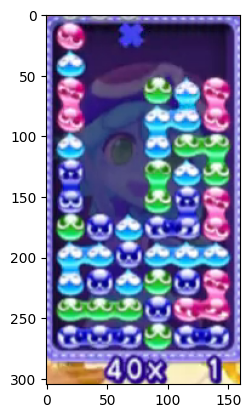

In [1]:
# 画像認識サンプル2
from puyo import field, field_list, puyo_yellow, puyo_green, puyo_parerpul, puyo_red, field_3_1
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

# plt.subplot(20, 2, 1),plt.imshow(field_3_1)
# plt.title('p1')

puyo_green_hsv = cv2.cvtColor(puyo_green, cv2.COLOR_BGR2HSV)
puyo_red_hsv = cv2.cvtColor(puyo_red, cv2.COLOR_BGR2HSV)
puyo_yellow_hsv = cv2.cvtColor(puyo_yellow, cv2.COLOR_BGR2HSV)
puyo_parerpul_hsv = cv2.cvtColor(puyo_parerpul, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(puyo_green_hsv)
hist_green = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_red_hsv)
hist_red = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_yellow_hsv)
hist_ywllow = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_parerpul_hsv)
hist_parerpul = cv2.calcHist([h], [0], None, [256], [0, 256])

field_hsv = cv2.cvtColor(field, cv2.COLOR_BGR2HSV)
for row in reversed(field_list):
    for i in range(6):
        puyo = row[i]
        puyo_hsv = cv2.cvtColor(puyo, cv2.COLOR_BGR2HSV)
        h,s,v = cv2.split(puyo_hsv)
        hist_h = cv2.calcHist([h], [0], None, [256], [0, 256])
        # print(hist_h)
        
        # method = cv2.HISTCMP_INTERSECT
        method = cv2.HISTCMP_CORREL
        rate_green = {'color': 'green', 'rate':cv2.compareHist(hist_h, hist_green, method)}
        rate_red = {'color': 'red', 'rate':cv2.compareHist(hist_h, hist_red, method)}
        rate_yellow = {'color': 'yellow', 'rate':cv2.compareHist(hist_h, hist_ywllow, method)}
        rate_parepul = {'color': 'parepul', 'rate':cv2.compareHist(hist_h, hist_parerpul, method)}

        
        rate_list = [rate_green, rate_red, rate_yellow, rate_parepul]
        color = max(rate_list, key=lambda x: x['rate'])
        
        print(color['color'], end=' ')
    print('')

fig = plt.figure()
plt.imshow(field)